# <font color='red'>BackPropagation</font>

**There will be some functions that start with the word "grader" ex: grader_sigmoid(), grader_forwardprop(), grader_backprop() etc, you should not change those function definition.<br><br>Every Grader function has to return True.**

## <font color='red'>Loading data </font>

In [1]:
import pickle
import numpy as np
from tqdm import tqdm
import matplotlib.pyplot as plt


with open('data.pkl', 'rb') as f:
    data = pickle.load(f)
print(data.shape)
X = data[:, :5]
y = data[:, -1]
print(X.shape, y.shape)

(506, 6)
(506, 5) (506,)


# <font color='red'>Computational graph</font>

<img src='https://i.imgur.com/seSGbNS.png'>


*  **If you observe the graph, we are having input features [f1, f2, f3, f4, f5] and 9 weights [w1, w2, w3, w4, w5, w6,    w7, w8, w9]**.<br><br>
*  **The final output of this graph is a value L which is computed as (Y-Y')^2** 

# <font color='red'>Task 1: Implementing backpropagation and Gradient checking </font>

<font color='blue'><b>Check this video for better understanding of the computational graphs and back propagation</font>

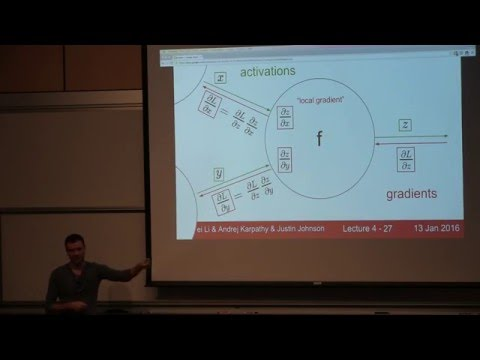

In [2]:
from IPython.display import YouTubeVideo
YouTubeVideo('i94OvYb6noo',width="1000",height="500")


*  <b>Write two functions<br>
    *  Forward propagation</b>(Write your code in<font color='blue'> def forward_propagation()</b></font>)<br><br>
    For easy debugging, we will break the computational graph into 3 parts.

    <font color='green'><b>Part 1</b></font></b>
    <img src='https://i.imgur.com/0xUaxy6.png'><br><br>
    <font color='green'><b>Part 2</b></font></b><br>
    <img src='https://i.imgur.com/J29pAJL.png'><br><br>
    <font color='green'><b>Part 3</b></font></b>
    <img src='https://i.imgur.com/vMyCsd9.png'>

    <pre>
    <font color='green'>
def forward_propagation(X, y, W):
        <font color='grey'>
        # X: input data point, note that in this assignment you are having 5-d data points
        # y: output varible
        # W: weight array, its of length 9, W[0] corresponds to w1 in graph, W[1] corresponds to w2 in graph, <br>         ..., W[8] corresponds to w9 in graph.  
        # you have to return the following variables
        # exp= part1 (compute the forward propagation until exp and then store the values in exp)
        # tanh =part2(compute the forward propagation until tanh and then store the values in tanh)
        # sig = part3(compute the forward propagation until sigmoid and then store the values in sig)
        # now compute remaining values from computional graph and get y'
        # write code to compute the value of L=(y-y')^2
        # compute derivative of L  w.r.to Y' and store it in dl
        # Create a dictionary to store all the intermediate values
        # store L, exp,tanh,sig,dl variables
        </font>
        return (dictionary, which you might need to use for back propagation)
        <font color='grey'>
        </font>
</font>
</pre>
    *  <b>Backward propagation</b>(Write your code in<font color='blue'> def backward_propagation()</b></font>)
    </b>
    <pre>
    <font color='green'>
    def backward_propagation(L, W,dictionary):
        <font color='grey'>
        # L: the loss we calculated for the current point
        # dictionary: the outputs of the forward_propagation() function
        # write code to compute the gradients of each weight [w1,w2,w3,...,w9]
        # Hint: you can use dict type to store the required variables 
        # return dW, dW is a dictionary with gradients of all the weights
        </font>
        return dW
        </font>
</font>
</pre>

 ## <font color='red'>Gradient clipping</font>

<b> Check this  <a href='https://towardsdatascience.com/how-to-debug-a-neural-network-with-gradient-checking-41deec0357a9'>blog link</a> for more details on Gradient clipping

 we know that the derivative of any function is
 
 $$\lim_{\epsilon\to0}\frac{f(x+\epsilon)-f(x-\epsilon)}{2\epsilon}$$


*  The definition above can be used as a numerical approximation of the derivative. Taking an epsilon small enough, the calculated approximation will have an error in the range of epsilon squared. 

*  In other words, if epsilon is 0.001, the approximation will be off by 0.00001.

Therefore, we can use this to approximate the gradient, and in turn make sure that backpropagation is implemented properly. This forms the basis of <b>gradient checking!</b>

## <Font color='blue'>Gradient checking example</font>

<font >
lets understand the concept with a simple example:
$f(w1,w2,x1,x2)=w_{1}^{2} . x_{1} + w_{2} . x_{2}$ 

from the above function , lets assume $w_{1}=1$, $w_{2}=2$, $x_{1}=3$, $x_{2}=4$ the gradient of $f$ w.r.t $w_{1}$ is

\begin{array} {lcl}
\frac{df}{dw_{1}} = dw_{1} &=&2.w_{1}.x_{1} \\& = &2.1.3\\& = &6
\end{array}


let calculate the aproximate gradient of $w_{1}$ as mentinoned in the above formula and considering $\epsilon=0.0001$

\begin{array} {lcl}
dw_1^{approx} & = & \frac{f(w1+\epsilon,w2,x1,x2)-f(w1-\epsilon,w2,x1,x2)}{2\epsilon} \\ & = & \frac{((1+0.0001)^{2} . 3 + 2 . 4) - ((1-0.0001)^{2} . 3 + 2 . 4)}{2\epsilon} \\ & = & \frac{(1.00020001 . 3 + 2 . 4) - (0.99980001. 3 + 2 . 4)}{2*0.0001} \\ & = & \frac{(11.00060003) - (10.99940003)}{0.0002}\\ & = & 5.99999999999
\end{array}

Then, we apply the following formula for gradient check: <i>gradient_check</i> = 
$\frac{\left\Vert\left (dW-dW^{approx}\rm\right) \right\Vert_2}{\left\Vert\left (dW\rm\right) \right\Vert_2+\left\Vert\left (dW^{approx}\rm\right) \right\Vert_2}$

The equation above is basically the Euclidean distance normalized by the sum of the norm of the vectors. We use normalization in case that one of the vectors is very small.
As a value for epsilon, we usually opt for 1e-7. Therefore, if gradient check return a value less than 1e-7, then it means that backpropagation was implemented correctly. Otherwise, there is potentially a mistake in your implementation. If the value exceeds 1e-3, then you are sure that the code is not correct.

in our example: <i>gradient_check</i> $ = \frac{(6 - 5.999999999994898)}{(6 + 5.999999999994898)} = 4.2514140356330737e^{-13}$

you can mathamatically derive the same thing like this

\begin{array} {lcl}
dw_1^{approx} & = & \frac{f(w1+\epsilon,w2,x1,x2)-f(w1-\epsilon,w2,x1,x2)}{2\epsilon} \\ & = & \frac{((w_{1}+\epsilon)^{2} . x_{1} + w_{2} . x_{2}) - ((w_{1}-\epsilon)^{2} . x_{1} + w_{2} . x_{2})}{2\epsilon} \\ & = & \frac{4. \epsilon.w_{1}. x_{1}}{2\epsilon} \\ & = &  2.w_{1}.x_{1}
\end{array}


## <font color='red'> Implement Gradient checking </font> <br>
 (Write your code in <font color='blue'> def gradient_checking()</font>)

**Algorithm** 



<pre>
<font color='darkblue'>
W = initilize_randomly
def gradient_checking(data_point, W):<font color='grey'>
    # compute the L value using forward_propagation()
    # compute the gradients of W using backword_propagation()</font>
    approx_gradients = []
    for each wi weight value in W:<font color='grey'>
        # add a small value to weight wi, and then find the values of L with the updated weights
        # subtract a small value to weight wi, and then find the values of L with the updated weights
        # compute the approximation gradients of weight wi</font>
        approx_gradients.append(approximation gradients of weight wi)<font color='grey'>
    # compare the gradient of weights W from backword_propagation() with the aproximation gradients of weights with <br>  gradient_check formula</font>
    return gradient_check</font>
<b>NOTE: you can do sanity check by checking all the return values of gradient_checking(),<br> they have to be zero. if not you have bug in your code
</pre></b>

# <font color='red'> Task 2 : Optimizers </font>

* As a part of this task, you will be implementing 3 type of optimizers(methods to update weight)
* Use the same computational graph that was mentioned above to do this task
* Initilze the 9 weights from normal distribution with mean=0 and std=0.01

**Check below video and <a href='https://cs231n.github.io/neural-networks-3/'>this</a> blog**

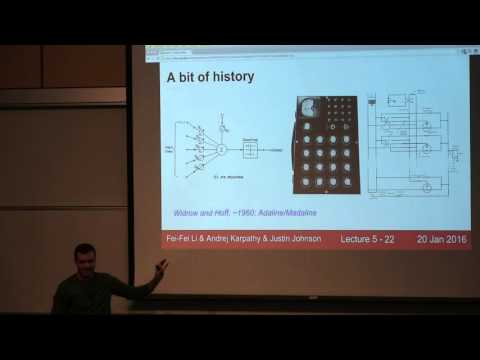

In [3]:
from IPython.display import YouTubeVideo
YouTubeVideo('gYpoJMlgyXA',width="1000",height="500")

<font color='blue'><b>Algorithm</b>

<pre>
    for each epoch(1-100):
        for each data point in your data:
            using the functions forward_propagation() and backword_propagation() compute the gradients of weights
            update the weigts with help of gradients  ex: w1 = w1-learning_rate*dw1
</pre>

## <font color='red'> Implement below tasks</b>


*  <b>Task 2.1</b>: you will be implementing the above algorithm with <b>Vanilla update</b> of weights<br><br>
*  <b>Task 2.2</b>: you will be implementing the above algorithm with <b>Momentum update</b> of weights<br><br>
*  <b>Task 2.3</b>: you will be implementing the above algorithm with <b>Adam update</b> of weights


**Note : If you get any assertion error while running grader functions, please print the variables in grader functions and check which variable is returning False .Recheck your logic for that variable .**

<br>
<br>
<br>

# <font color='red'>Task 1 </font>

## <font color='blue'>Forward propagation </font>

In [2]:
def sigmoid(z):
    '''In this function, we will compute the sigmoid(z)'''
    # we can use this function in forward and backward propagation
    sigma = 1 / (1 + np.exp(-z))

    return sigma

 <img src='https://i.imgur.com/0xUaxy6.png'><br><br>

In [3]:
#forward_propagation
def part_1_graph(x,w):
    
    #a = w1 * f1 
    
    a = w[0] * x[0]
    
    
    b = w[1] * x[1]
    
    c = a + b
    
    d  = c * c

    f = w[5] + d
    
    exp = np.exp(f)
    
    return exp

<img src='https://i.imgur.com/J29pAJL.png'>

In [4]:
#computing the tanh function
def part_2_graph(w,exp):
    
    a = exp + w[6]
    
    return np.tanh(a)

 <img src='https://i.imgur.com/vMyCsd9.png'>

In [5]:
def part_3_graph(x,w):
    
    a = w[2] * x[2]
    
    b = w[3] * x[3]
    
    c = w[4] * x[4]
    
    d = b + c
    
    e = np.sin(a)
    
    f = d * e
    
    g = f + w[7]
    
    sigma = sigmoid(g)
    
    return sigma

In [6]:

    
def forward_propagation(x, y, w):
        '''In this function, we will compute the forward propagation '''
        # X: input data point, note that in this assignment you are having 5-d data points
        
        
        # y: output varible
        # W: weight array, its of length 9, W[0] corresponds to w1 in graph, W[1] corresponds to w2 in graph,..., W[8] corresponds to w9 in graph.  
        # you have to return the following variables
        
        #exponentiation for the forward_propagation
        exp = part_1_graph(x,w)
        #tanh function
        tanh = part_2_graph(w,exp)
        #sigmoid
        sigma = part_3_graph(x,w)
        #
        y_dash = (sigma * w[8]) + tanh
        
        #loss
        l = (y - y_dash) ** 2
        
        #derivative  of loss
        dl = -2 * (y - y_dash)
        
        cache = {}
        cache["dy_pr"] = dl
        
        cache['loss'] = l
        
        cache['exp'] = exp
        
        cache['tanh'] = tanh
        
        cache['sigmoid'] = sigma
        # exp= part1 (compute the forward propagation until exp and then store the values in exp)
        # tanh =part2(compute the forward propagation until tanh and then store the values in tanh)
        # sig = part3(compute the forward propagation until sigmoid and then store the values in sig)
        # now compute remaining values from computional graph and get y'
        # write code to compute the value of L=(y-y')^2
        # compute derivative of L  w.r.to Y' and store it in dl
        # Create a dictionary to store all the intermediate values
        # store L, exp,tanh,sig variables
        #return (dictionary, which you might need to use for back propagation)
        return cache

<font color='cyan'>Grader function - 1</font>

In [7]:
def grader_sigmoid(z):
  val=sigmoid(z)
  assert(val==0.8807970779778823)
  return True
grader_sigmoid(2)

True

<font color='cyan'>Grader function - 2 </font>

In [8]:
def grader_forwardprop(data):
    dl = (data['dy_pr']==-1.9285278284819143)
    loss=(data['loss']==0.9298048963072919)
    part1=(data['exp']==1.1272967040973583)
    part2=(data['tanh']==0.8417934192562146)
    part3=(data['sigmoid']==0.5279179387419721)
    assert(dl and loss and part1 and part2 and part3)
    return True
w=np.ones(9)*0.1
d1=forward_propagation(X[0],y[0],w)
grader_forwardprop(d1)

True

## <font color='blue'>Backward propagation</font>

In [9]:
import math
def backward_propagation(x,w,dict_):
    '''In this function, we will compute the backward propagation '''
    
    grad_l = dict_['dy_pr']
    
    grad_sigmoid = dict_['sigmoid'] * (1 - dict_['sigmoid'])
    
    
    
    # L: the loss we calculated for the current point
    # dictionary: the outputs of the forward_propagation() function
    # write code to compute the gradients of each weight [w1,w2,w3,...,w9]
    # Hint: you can use dict type to store the required variables 

    a = w[0] * x[0]
    
    
    b = w[1] * x[1]
    
    c = a + b
    
   
    
    dw1 =  grad_l * (1-(dict_['tanh'] ** 2)) * dict_["exp"] * (2 * c * x[0])
    
    dw2 = grad_l * (1-(dict_['tanh'] ** 2)) * dict_["exp"] * (2 * c * x[1])
    # dw1 = # in dw1 compute derivative of L w.r.to w1
    # dw2 = # in dw2 compute derivative of L w.r.to w2
    # dw3 = # in dw3 compute derivative of L w.r.to w3
    # dw4 = # in dw4 compute derivative of L w.r.to w4
    # dw5 = # in dw5 compute derivative of L w.r.to w5
    # dw6 = # in dw6 compute derivative of L w.r.to w6
    
    # dw8 = # in dw8 compute derivative of L w.r.to w8
   
    dw3 = dict_['dy_pr'] * w[8] * grad_sigmoid * ((x[3] * w[3]) + (x[4] * w[4])) * np.cos(w[2] * x[2]) * x[2] 
    
    dw4 =  dict_['dy_pr'] * w[8] * grad_sigmoid * np.sin(w[2] * x[2]) * x[3]
    
    dw5 =  dict_['dy_pr'] * w[8] * grad_sigmoid * np.sin(w[2] * x[2]) * x[4]
    
    dw6 = dict_['dy_pr'] * ((1 - dict_['tanh'] **2)) * dict_['exp']
    # dw7 = # in dw7 compute derivative of L w.r.to w7
    dw7 = dict_['dy_pr'] * ((1 - dict_['tanh'] **2))
    # dw7 = # in dw7 compute derivative of L w.r.to w7
    dw8 = dict_['dy_pr'] * w[8] *  grad_sigmoid
     # dw9 = # in dw9 compute derivative of L w.r.to w9
    dw9 = dict_['dy_pr'] * dict_['sigmoid']
  
    dw = {"dw1": dw1 ,'dw2' : dw2, 'dw3':dw3,'dw4':dw4, 'dw5' : dw5 ,'dw6' : dw6, 'dw7': dw7, 'dw8' : dw8, 'dw9' : dw9}
    
    
    return dw
    # return dW, dW is a dictionary with gradients of all the weights

<font color='cyan'>Grader function - 3 </font>

In [10]:
def grader_backprop(data):
    dw1=(data['dw1']==-0.22973323498702003)
    dw2=(data['dw2']==-0.021407614717752925)
    dw3=(data['dw3']==-0.005625405580266319)
    dw4=(data['dw4']==-0.004657941222712423)
    dw5=(data['dw5']==-0.0010077228498574246)
    dw6=(data['dw6']==-0.6334751873437471)
    dw7=(data['dw7']==-0.561941842854033)
    dw8=(data['dw8']==-0.04806288407316516)
    dw9=(data['dw9']==-1.0181044360187037)
    assert(dw1 and dw2 and dw3 and dw4 and dw5 and dw6 and dw7 and dw8 and dw9)
    return True 
w=np.ones(9)*0.1
d1=forward_propagation(X[0],y[0],w)
d1=backward_propagation(X[0],w,d1)
grader_backprop(d1)

True

## <font color='blue'> Implement gradient checking</font>

In [12]:
def gradient_checking(datapoint,y, W,epsilon):
    # compute the L value using forward_propagation()
    
    gradient_check = []
    #compute the forward_propogarion 
    cache = forward_propagation(datapoint,y,W)
    #compute backward_propogation
    grad = backward_propagation(datapoint,W,cache)
    # compute the gradients of W using backword_propagation()
    approx_gradients = []
   
    #add small varience in each weight and compute the grad approximation
    for w in range(len(W)):
        theta_plus_weight,theta_minus_weight = [],[]
        
        for i in W:
            if  i == W[w]:
                theta_plus_weight.append(i + epsilon)
                theta_minus_weight.append(i - epsilon)
            else:
                theta_plus_weight.append(i)
                theta_minus_weight.append(i)
                
        lossPlus = forward_propagation(datapoint,y,theta_plus_weight)
        lossMinus = forward_propagation(datapoint,y,theta_minus_weight)
        
        #grad_approximation 
        grad_approximation = (lossPlus['loss'] - lossMinus['loss']) / (2 * epsilon)
        
        approx_gradients.append(grad_approximation)
    
    grad = list(grad.values())
    
    if len(approx_gradients) == len(grad):
        
        for approx in range(len(grad)):
            
            numerator = np.linalg.norm(float(grad[approx]) - float(approx_gradients[approx]))
            denominator = np.linalg.norm(float(grad[approx])) + np.linalg.norm(float(approx_gradients[approx]))

            difference = numerator / denominator

            if difference < 1e-7:
                
                gradient_check.append(difference)
            else:
                print("Error in Gradient : {0}".format(grad[approx]))
            
    else:
        print("Length is mismatching")
        
        # add a small value to weight wi, and then find the values of L with the updated weights
        # subtract a small value to weight wi, and then find the values of L with the updated weights
        # compute the approximation gradients of weight wi
    # compare the gradient of weights W from backword_propagation() with the aproximation gradients of weights with gradient_check formula
    return gradient_check
w = np.random.normal(0.0,0.01,size = 9)
print("Gradient Checking : {0}".format(gradient_checking(X[0],y[0],w,0.0001)))

Gradient Checking : [7.362150322263428e-09, 2.463797386193814e-10, 1.3034576038943928e-09, 3.1669130245845327e-09, 1.3670778027900151e-08, 1.2603894299020707e-09, 2.6672395515602407e-09, 4.849970475989172e-10, 6.418032240380466e-13]


# <font color='red'>Task 2: Optimizers

###<font color='blue'>Algorithm with Vanilla update of weights</font>

In [14]:
#https://towardsdatascience.com/adam-latest-trends-in-deep-learning-optimization-6be9a291375c
#algorithm for SGD

class NeuralNetworkOptimizer:
    
    def __init__(self,X,Y,epoch,learning_rate):
        
        self.X = X
        self.Y = y
        self.epochs = epoch
        self.learning_rate = learning_rate
        self.loss = []
        
        
    def sigmoid(self,z):
    # we can use this function in forward and backward propagation
        sigma = 1 / (1 + np.exp(-z))

        return sigma
    
    def part_1_graph(self,x,w):
        #a = w1 * f1 
        a = w[0] * x[0]
        b = w[1] * x[1]
        c = a + b
        d  = c * c
        f = w[5] + d
        exp = np.exp(f)
        return exp

    #computing the tanh function
    def part_2_graph(self,w,exp):
        a = exp + w[6]
        return np.tanh(a)

    def part_3_graph(self,x,w):
    
        a = w[2] * x[2]
        b = w[3] * x[3]
        c = w[4] * x[4]
        d = b + c
        e = np.sin(a)
        f = d * e
        g = f + w[7]
        sigma = sigmoid(g)
        return sigma
    
    def forward_propagation(self,x, y, w):
        cache = {}
        exp = self.part_1_graph(x,w)
        tanh =self.part_2_graph(w,exp)
        sigma = self.part_3_graph(x,w)
        y_dash = (sigma * w[8]) + tanh
        l = (y - y_dash) ** 2
        dl = -2 * (y - y_dash)
        cache["dy_pr"] = dl
        cache['loss'] = l
        cache['exp'] = exp
        cache['tanh'] = tanh
        cache['sigmoid'] = sigma
        return cache
    
    
    def backward_propagations(self,x,w,dict_):
        '''In this function, we will compute the backward propagation '''

        grad_l = dict_['dy_pr']
        grad_sigmoid = dict_['sigmoid'] * (1 - dict_['sigmoid'])
        # L: the loss we calculated for the current point
        # dictionary: the outputs of the forward_propagation() function
        # write code to compute the gradients of each weight [w1,w2,w3,...,w9]
        # Hint: you can use dict type to store the required variables 

        a = w[0] * x[0]
        b = w[1] * x[1]
        c = a + b
        dw1 =  grad_l * (1-(dict_['tanh'] ** 2)) * dict_["exp"] * (2 * c * x[0])
        dw2 = grad_l * (1-(dict_['tanh'] ** 2)) * dict_["exp"] * (2 * c * x[1])
        # dw1 = # in dw1 compute derivative of L w.r.to w1
        # dw2 = # in dw2 compute derivative of L w.r.to w2
        # dw3 = # in dw3 compute derivative of L w.r.to w3
        # dw4 = # in dw4 compute derivative of L w.r.to w4
        # dw5 = # in dw5 compute derivative of L w.r.to w5
        # dw6 = # in dw6 compute derivative of L w.r.to w6

        # dw8 = # in dw8 compute derivative of L w.r.to w8

        dw3 = dict_['dy_pr'] * w[8] * grad_sigmoid * ((x[3] * w[3]) + (x[4] * w[4])) * np.cos(w[2] * x[2]) * x[2] 

        dw4 =  dict_['dy_pr'] * w[8] * grad_sigmoid * np.sin(w[2] * x[2]) * x[3]

        dw5 =  dict_['dy_pr'] * w[8] * grad_sigmoid * np.sin(w[2] * x[2]) * x[4]

        dw6 = dict_['dy_pr'] * ((1 - dict_['tanh'] **2)) * dict_['exp']
        # dw7 = # in dw7 compute derivative of L w.r.to w7
        dw7 = dict_['dy_pr'] * ((1 - dict_['tanh'] **2))
        # dw7 = # in dw7 compute derivative of L w.r.to w7
        dw8 = dict_['dy_pr'] * w[8] *  grad_sigmoid
         # dw9 = # in dw9 compute derivative of L w.r.to w9
        dw9 = dict_['dy_pr'] * dict_['sigmoid']

        dw = {"dw1": dw1 ,'dw2' : dw2, 'dw3':dw3,'dw4':dw4, 'dw5' : dw5 ,'dw6' : dw6, 'dw7': dw7, 'dw8' : dw8, 'dw9' : dw9}


        return dw
    
    
    def vennila_update(self):
    
        #initialize weight randomly not all zero small mean  and varience
        W = np.random.normal(0.0,0.01,size = 9)
        loss = []
        #number of epochs untill convergence
        for epoch in tqdm(range(self.epochs)):
            
            for i in range(self.X.shape[0]):
                 #compute the forward_propogation
                cache =  self.forward_propagation(self.X[i],self.Y[i],W)
                #compute the derivative 
                dw = self.backward_propagations(self.X[i],W,cache)
                #new Weights
                weighnew = np.array(list(dw.values()))
                
                #update the weights
                W = W - self.learning_rate * weighnew     
            loss.append(cache['loss'])
            
        return (loss,W)
    
    
#     v = mu * v - learning_rate * dx # integrate velocity
#     x += v
    
    def momentum_update(self,mu):
    
        #initialize weight randomly not all zero small mean  and varience
        W = np.random.normal(0.0,0.01,size = 9)
        loss = []
       
        #initially v is defines as vector zeos
        v = np.zeros((len(W)))
        #number of epochs untill convergence
        for epoch in tqdm(range(self.epochs)):
            
            for i in range(self.X.shape[0]):
                 #compute the forward_propogation
                cache =  self.forward_propagation(self.X[i],self.Y[i],W)
                #compute the derivative 
                dw = self.backward_propagations(self.X[i],W,cache)
                #new Weights
                grad_weight = np.array(list(dw.values()))
                
                v = mu * v - self.learning_rate * grad_weight
                
                
                #update the weights
                W = W + v
            loss.append(cache['loss'])
            
        return (loss,W)
    
    
#     m = beta1*m + (1-beta1)*dx
#     mt = m / (1-beta1**t)
#     v = beta2*v + (1-beta2)*(dx**2)
#     vt = v / (1-beta2**t)
#     x += - learning_rate * mt / (np.sqrt(vt) + eps)
    
    def Adam_update(self,beta1,beta2):
        
         #initialize weight randomly not all zero small mean  and varience
        W = np.random.normal(0.0,0.01,size = 9)
        loss = []
        epsilon = 1e-8
        m =  np.zeros((len(W)))
        t =  np.zeros((len(W)))
        vt = np.zeros((len(W)))
        v = np.zeros((len(W)))
        #number of epochs untill convergence
        for epoch in tqdm(range(self.epochs)):
            
            for i in range(self.X.shape[0]):
                 #compute the forward_propogation
                t += 1
                
                cache =  self.forward_propagation(self.X[i],self.Y[i],W)
                #compute the derivative 
                dw = self.backward_propagations(self.X[i],W,cache)
                #new Weights
                grad_weight = np.array(list(dw.values())) 
                
                m = beta1 * m + ((1-beta1) * grad_weight)
                
                mt = m / (1 - beta2 ** t)
                
                v = beta2*v + (1-beta2)*(grad_weight ** 2)
                
                vt = v / (1-beta2 ** t)
                
                #weighnew = np.array(list(dw.values()))
                
                #update the weights
                W = W - self.learning_rate * (mt / (np.sqrt(vt) + epsilon))
                 
            loss.append(cache['loss'])
            
        return (loss,W)
        
        
    
    
    
            #compute forward_prop

# Adam Optimizer 

In [23]:
nn_adam = NeuralNetworkOptimizer(X,y,100,0.0001)
loss_adam,optimal_weight_adam = nn_adam.Adam_update(0.9,0.999)

100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:04<00:00, 20.74it/s]


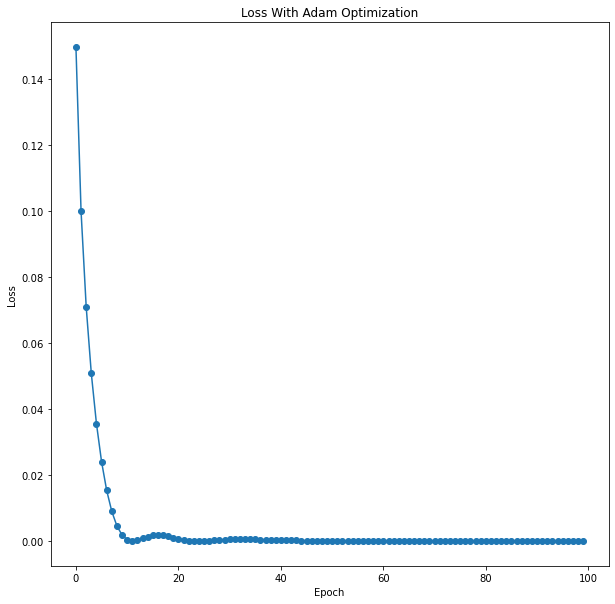

In [25]:
epoch = 100
plt.figure(figsize = (10,10))
plt.title("Loss With Adam Optimization")
plt.plot(range(epoch),loss_adam[:])
plt.scatter(range(epoch),loss_adam[:])
#plt.plot(range(epoch),loss2)
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.show()

##  Plain SGD

In [16]:
nn = NeuralNetworkOptimizer(X,y,100,0.0001)
loss_simple,optimal_weight = nn.vennila_update()

100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:03<00:00, 32.86it/s]


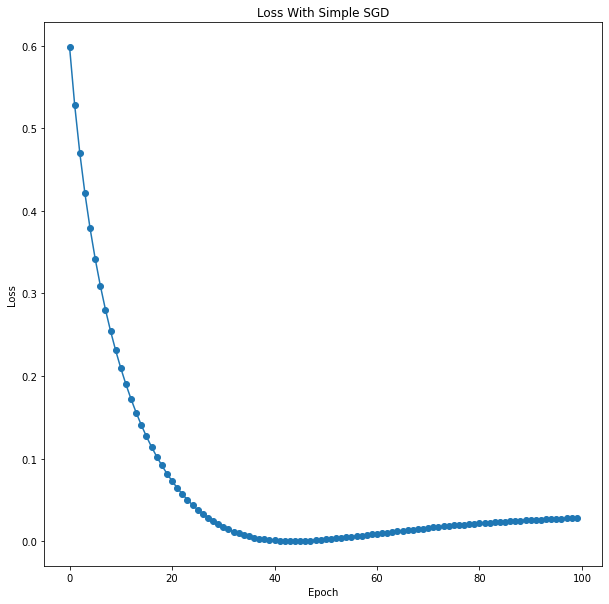

In [18]:
epoch = 100
plt.figure(figsize = (10,10))
plt.title("Loss With Simple SGD")
plt.plot(range(epoch),loss_simple[:])
plt.scatter(range(epoch),loss_simple[:])
#plt.plot(range(epoch),loss2)
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.show()

## SGD With Momentum 

In [19]:
nn_momentum = NeuralNetworkOptimizer(X,y,100,0.0001)
loss_momentum,optimal_weight_momentum = nn_momentum.momentum_update(0.9)

100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:03<00:00, 29.60it/s]


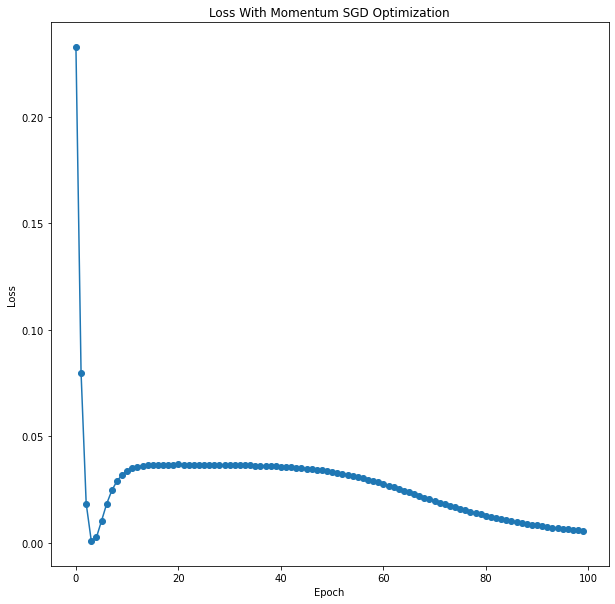

In [22]:
epoch = 100
plt.figure(figsize = (10,10))
plt.title("Loss With Momentum SGD Optimization")
plt.plot(range(epoch),loss_momentum[:])
plt.scatter(range(epoch),loss_momentum[:])
#plt.plot(range(epoch),loss2)
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.show()

###  Comparision between the Optimizers

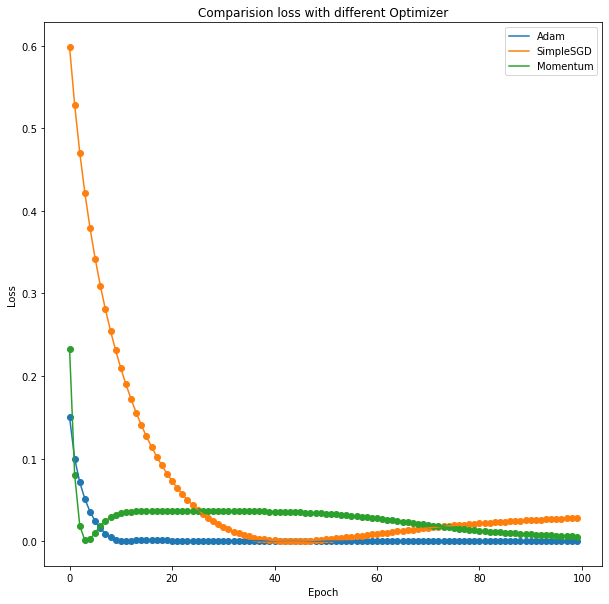

In [26]:
epoch = 100
plt.figure(figsize = (10,10))
plt.title("Comparision loss with different Optimizer")
plt.plot(range(epoch),loss_adam[:])
plt.scatter(range(epoch),loss_adam[:])
plt.plot(range(epoch),loss_simple[:])
plt.scatter(range(epoch),loss_simple[:])
plt.plot(range(epoch),loss_momentum[:])
plt.scatter(range(epoch),loss_momentum[:])
plt.legend(['Adam','SimpleSGD','Momentum'])
#plt.plot(range(epoch),loss2)
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.show()

## Observation 

we Perform the Neural Network With Three Different types of Optimizers to show which optimizers perform well.we use Simple SGD,SGD + momentum and Adam Optimzer. We can Observe the loss Simple SGD started loss at 0.6, Loss is decreasing slowly at each epoch, At the Stage of 35 Epoch, the loss is converged close to zero. In the later stage Epoch, the loss is increasing. Greenline indicated the Adam Optimizer. Momentum Optimizer started at loss 0.2 the loss converged zero at the 4th epoch, At the epoch Increases loss also increases, Adam Optimizer Perform Well Comparing Other Optimizer we can observe loss is converged at 10 epoch. At a later stage Epoch increases loss does not change much, But in the case of SGD and Momentum, Later stages loss is increasing slowly.We can Conclude ADAM is the Best optimizer for this Problem

###<font color='blue'>Algorithm with Vanilla update of weights</font>

## Different Learning Rate 

100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:04<00:00, 24.86it/s]


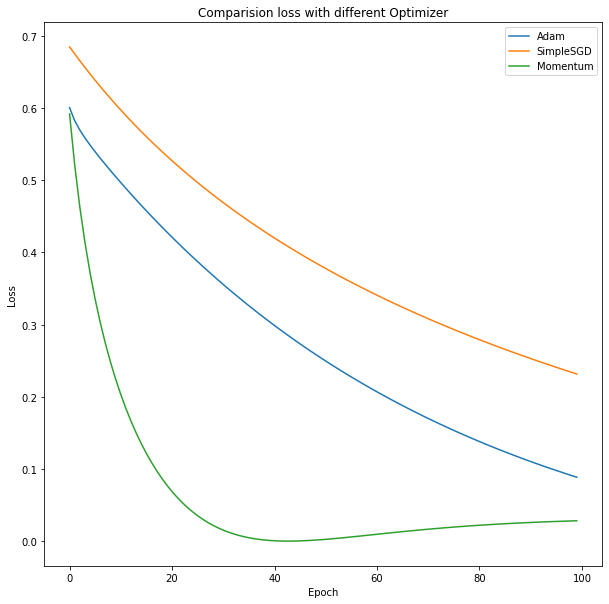

In [27]:
nn_adam = NeuralNetworkOptimizer(X,y,100,0.00001)
loss_adam,optimal_weight_adam = nn_adam.Adam_update(0.9,0.999)

nn = NeuralNetworkOptimizer(X,y,100,0.00001)
loss_simple,optimal_weight = nn.vennila_update()

nn_momentum = NeuralNetworkOptimizer(X,y,100,0.00001)
loss_momentum,optimal_weight_momentum = nn_momentum.momentum_update(0.9)

epoch = 100
plt.figure(figsize = (10,10))
plt.title("Comparision loss with different Optimizer")
plt.plot(range(epoch),loss_adam[:])
plt.plot(range(epoch),loss_simple[:])
plt.plot(range(epoch),loss_momentum[:])
plt.legend(['Adam','SimpleSGD','Momentum'])
#plt.plot(range(epoch),loss2)
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.show()

100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:04<00:00, 21.56it/s]


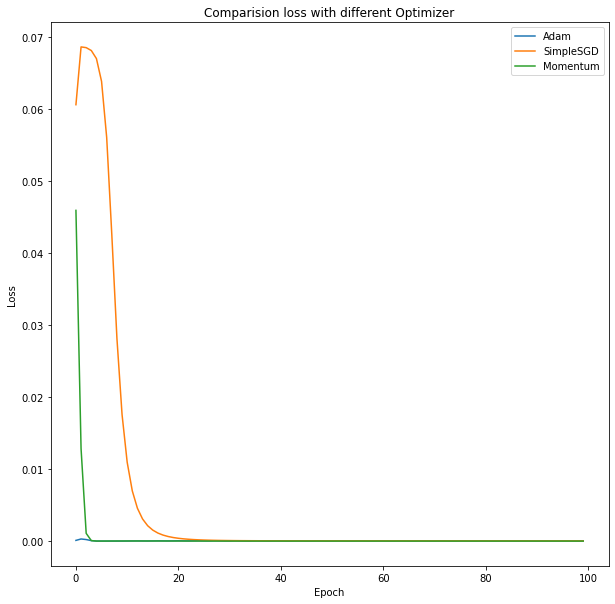

In [28]:
nn_adam = NeuralNetworkOptimizer(X,y,100,0.01)
loss_adam,optimal_weight_adam = nn_adam.Adam_update(0.9,0.999)

nn = NeuralNetworkOptimizer(X,y,100,0.01)
loss_simple,optimal_weight = nn.vennila_update()

nn_momentum = NeuralNetworkOptimizer(X,y,100,0.01)
loss_momentum,optimal_weight_momentum = nn_momentum.momentum_update(0.9)

epoch = 100
plt.figure(figsize = (10,10))
plt.title("Comparision loss with different Optimizer")
plt.plot(range(epoch),loss_adam[:])
plt.plot(range(epoch),loss_simple[:])
plt.plot(range(epoch),loss_momentum[:])
plt.legend(['Adam','SimpleSGD','Momentum'])
#plt.plot(range(epoch),loss2)
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.show()

100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:04<00:00, 22.40it/s]


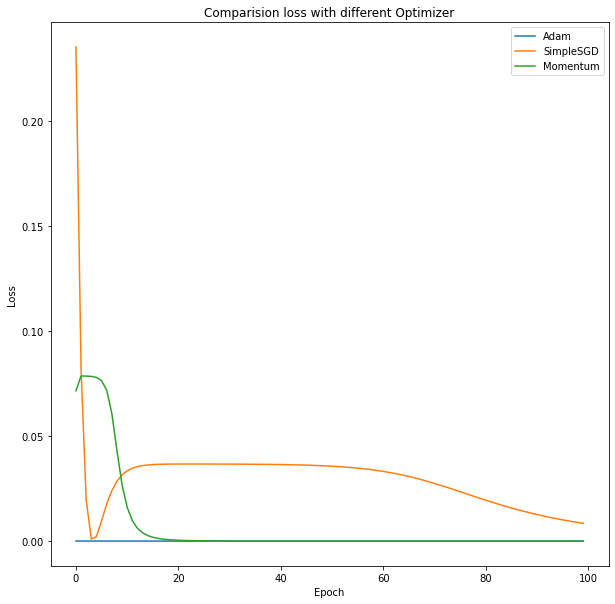

In [29]:
nn_adam = NeuralNetworkOptimizer(X,y,100,0.001)
loss_adam,optimal_weight_adam = nn_adam.Adam_update(0.9,0.999)
nn = NeuralNetworkOptimizer(X,y,100,0.001)
loss_simple,optimal_weight = nn.vennila_update()
nn_momentum = NeuralNetworkOptimizer(X,y,100,0.001)
loss_momentum,optimal_weight_momentum = nn_momentum.momentum_update(0.9)
epoch = 100
plt.figure(figsize = (10,10))
plt.title("Comparision loss with different Optimizer")
plt.plot(range(epoch),loss_adam[:])
plt.plot(range(epoch),loss_simple[:])
plt.plot(range(epoch),loss_momentum[:])
plt.legend(['Adam','SimpleSGD','Momentum'])
#plt.plot(range(epoch),loss2)
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.show()